# MIE 1624 Introduction to Data Science and Analytics

# Assignment 1 Explore the Kaggle Survey Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math 
from scipy.stats import f_oneway

In [2]:
# Read the clean_kaggle_data.csv
df = pd.read_csv('clean_kaggle_data.csv', index_col = 0)
df

/Users/jia/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (74,78,115,147,154,172,176,213,225,229,232) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
4,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
5,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,04-Mar,...,NaN,NaN,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19703,346,22-24,Male,-1,India,Bachelor’s degree,Data Scientist,-1,50-249 employees,04-Mar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
19709,88,25-29,Prefer not to say,-1,Austria,No formal education past high school,Data Scientist,-1,250-999 employees,02-Jan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
19713,473,18-21,Male,-1,India,Bachelor’s degree,Other,-1,250-999 employees,04-Mar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
19715,176,25-29,Male,-1,India,Master’s degree,Statistician,-1,50-249 employees,15-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


# 1 Exploratory Data Analysis

In [3]:
# Check if there are any missing values in each column of Q1-Q8
df.isnull().sum()[0:11]

Time from Start to Finish (seconds)    0
Q1                                     0
Q2                                     0
Q2_OTHER_TEXT                          0
Q3                                     0
Q4                                     0
Q5                                     0
Q5_OTHER_TEXT                          0
Q6                                     0
Q7                                     0
Q8                                     0
dtype: int64

# 1.1 Bar chart: analysis the age range for India and US participants

In [4]:
# List the top ten participant's country 
country_list = df.Q3.value_counts(normalize=True)
print(country_list[0:7])

India                       0.198208
United States of America    0.170761
Other                       0.056414
Brazil                      0.042810
Japan                       0.038409
Russia                      0.034088
Germany                     0.028807
Name: Q3, dtype: float64


**Comment: from above list, most of participant come from India and US, so the bar plots are focused on analyzing the age and education level for India and US participant.**

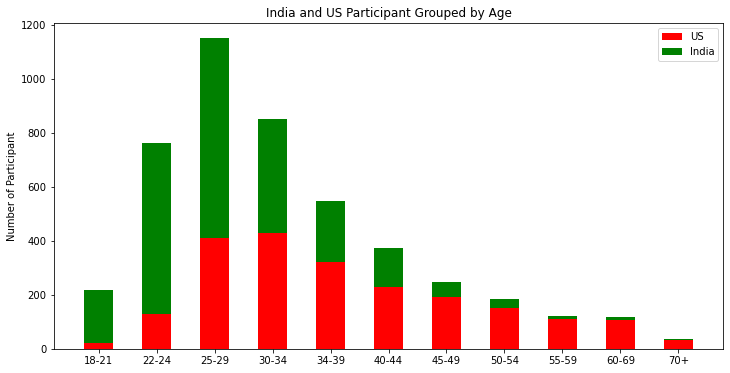

In [5]:
x_len = len(df.Q1.unique())
ind = np.arange(x_len) 
plt.figure(figsize=(12,6))
plt.title('India and US Participant Grouped by Age')
plt.xticks(ind, ('18-21', '22-24', '25-29', '30-34', '34-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+'))
plt.ylabel('Number of Participant')

# List the India and US participants for each age group, then sorted by the index
india_age = df['Q1'][df['Q3'] == "India"].value_counts().sort_index()
us_age = df['Q1'][df['Q3'] == "United States of America"].value_counts().sort_index()
width = 0.5

# Plot US and India data into one bar plot, botton red bar represets US and the top green bar represent India
p1 = plt.bar(ind, us_age, width, color='red')
p2 = plt.bar(ind, india_age, width, bottom=us_age, color='green')
plt.legend((p1[0], p2[0]), ('US', 'India'), loc = 1)
plt.show()

In [6]:
average_age = {
    '18-21': 19.5,
    '22-24': 23,
    '25-29': 27,
    '30-34': 32,
    '34-39': 36.5,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-69': 64.5,
    '70+': 80 
}
df[['Q1']] = df.Q1.map(average_age)
US_age = df[['Q1']].loc[df['Q3'] == 'United States of America']
India_age = df[['Q1']].loc[df['Q3'] == 'India']

In [7]:
# Calucate the mean, median and standard derivative for US and India on their average age
US_age_mean = US_age.mean()[0]
India_age_mean = India_age.mean()[0]
US_age_median = US_age.median()[0]
India_age_median = India_age.median()[0]
US_age_std = US_age.std()[0]
India_age_std = India_age.std()[0]
print('Age for US: mean:', US_age_mean, '| median', US_age_median, '| standard deviation', US_age_std)
print('Age for India: mean:', India_age_mean, '| median', India_age_median, '| standard deviation', India_age_std)

Age for US: mean: 38.90104740904079 | median 32.0 | standard deviation 13.372356005397638
Age for India: mean: 28.380497556641494 | median 27.0 | standard deviation 7.699303109668496


**Above bar chart illstrates that the age group for participants from US has largest proportion is that of 30-34, and the age group for participants from India has largest proportion is that of 25-29. More than 50% of the participants come from US are 25 to 39 years old, while approximately 50% of the participants in India are 22 to 29 years old. Almost 90% participants in the 18-21 age group come from India, and over 95% participants between 55 to over 70 years old are American. Overall, most participants from India are in young and middle age, very few are above 40 years old. Compared to India, in US, there are more participants over 40 years old and less young participants.**

**Comparing the mean and median, the mean of the age for US participants is larger than its median, and the mean of the age for Indian participants is closed to its median. From the standard deviation, the age difference between US participants can be large, and the age difference between Indian participants is relatively small.**

# 1.2 Bar chart: analysis the education for India and US participants

In [8]:
encode_education = {   
    'Bachelor’s degree': 0,
    'Doctoral degree': 1,
    'I prefer not to answer': 2,
    'Master’s degree': 3,
    'No formal education past high school': 4,
    'Professional degree': 5,
    'Some college/university study without earning a bachelor’s degree': 6,
    }

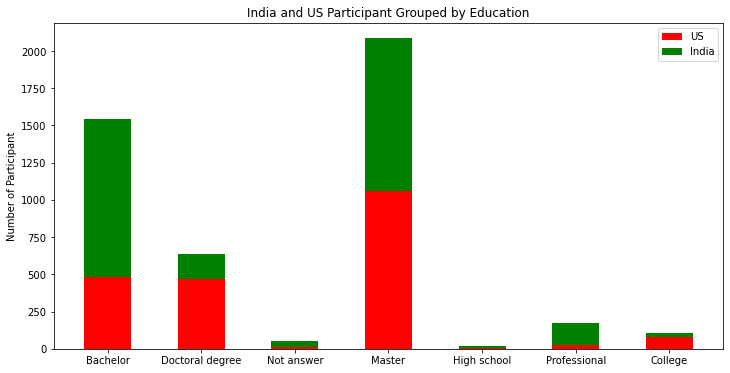

In [9]:
len_edu = len(df.Q4.unique())
ind_edu = np.arange(len_edu) 
plt.figure(figsize=(12,6))
plt.title('India and US Participant Grouped by Education')
plt.xticks(ind_edu, ('Bachelor', 'Doctoral degree','Not answer', 'Master', 'High school', 'Professional', 'College'))
plt.ylabel('Number of Participant')

# List the India and US participants for each degree, then sorted by the index
india_edu = df['Q4'][df['Q3'] == "India"].value_counts().sort_index()
us_edu = df['Q4'][df['Q3'] == "United States of America"].value_counts().sort_index()
width = 0.5

p1_edu = plt.bar(ind_edu, us_edu, width, color='red')
p2_edu = plt.bar(ind_edu, india_edu, width, bottom=us_edu, color='green')
plt.legend((p1_edu[0], p2_edu[0]), ('US', 'India'), loc = 1)
plt.show()

**Above bar plot shows the education of the participants in US and India. In India, over 90% of the participants wish or have the Bachelor and Master degree, a small proportion of participants with Doctoral and Professional degree. In US, around 50% of the participants plan to or already have Master degree, 20% participants with Bachelor degree and another 20% participants with Doctoral degree. Overall, more participants in US plan to have or already have a higher level of education than India, approximately 70% participants in US have or plan to have the Master degree or Doctoral degree, 50% in India for the Master degree or Doctoral degree.**

# 1.3 Box plot: analysis the average salary vs education

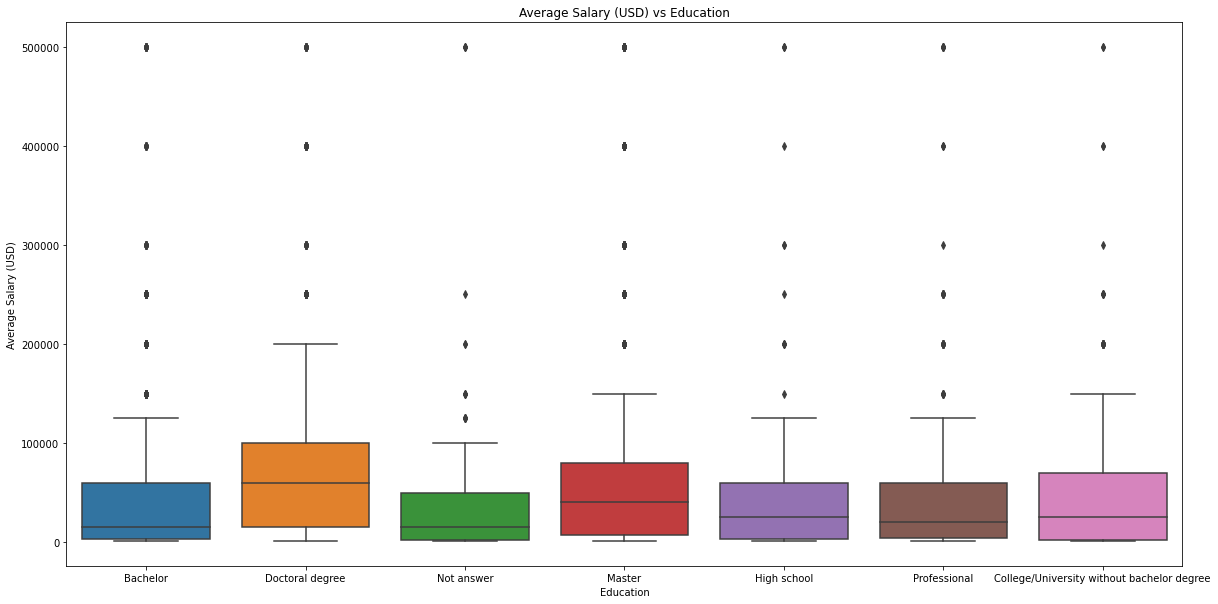

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(df.Q4.map(encode_education), df.Q10)
plt.xticks(plt.xticks()[0], ('Bachelor', 'Doctoral degree','Not answer', 'Master', 'High school', 'Professional', 
                             'College/University without bachelor degree'))
plt.xlabel('Education')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary (USD) vs Education')
plt.show()

In [11]:
# Calucate the mean, median and standard derivative for different education level
highschool_salary = df[['Q10']].loc[df['Q4'] == 'No formal education past high school']
professional_salary = df[['Q10']].loc[df['Q4'] == 'Professional degree']
collage_salary = df[['Q10']].loc[df['Q4'] == 'Some college/university study without earning a bachelor’s degree']

highschool_salary_mean = highschool_salary.mean()[0]
collage_salary_mean = collage_salary.mean()[0]
professional_salary_mean = professional_salary.mean()[0]

highschool_salary_median = highschool_salary.median()[0]
collage_salary_median = collage_salary.median()[0]
professional_salary_median = professional_salary.median()[0]

highschool_salary_std = highschool_salary.std()[0]
collage_salary_std = collage_salary.std()[0]
professional_salary_std = professional_salary.std()[0]

In [12]:
print('Salary for high school: mean:', highschool_salary_mean, '| median', highschool_salary_median, '| standard deviation', highschool_salary_std)
print('Salary for professional degree: mean:', professional_salary_mean, '| median', professional_salary_median, '| standard deviation', professional_salary_std)
print('Salary for college: mean:', collage_salary_mean, '| median', collage_salary_median, '| standard deviation', collage_salary_std)

Salary for high school: mean: 57180.0 | median 25000.0 | standard deviation 96604.66495114291
Salary for professional degree: mean: 52551.94805194805 | median 20000.0 | standard deviation 84491.42550094452
Salary for college: mean: 49665.45893719807 | median 25000.0 | standard deviation 69634.16885629512


**From above box plot, it can be noticed that the median of average salary is increasing with the level of education. Among these seven educational options, Doctoral degree has the highest upper quartile and median, Master degree is the second-highest and Bachelor degree has the lowest median. Furthermore, with the increasing of the level of degree the box is more stretched, which means the gap between the upper quartile and the lower quartile becomes wider.**

**The analyze about the mean, median and standard derivative for Bachelor’s degree, Doctoral degree and Master’s degree shows at 3a.**

**From above statistical data, the other education levels have a large gap between mean and median, their means are larger than their median. Only the standard deviation are quite large for these three education levels.**

# 2 Difference between average salary (Q9) of males vs. females

# 2.a Compute and report descriptive statistics for each group

In [12]:
# Select the salary only for male and female
male = df[['Q10']].loc[df['Q2'] == 'Male']
female = df[['Q10']].loc[df['Q2'] == 'Female']

In [13]:
# Calucate the mean, median and standard derivative for male and female
male_mean = male.mean()[0]
female_mean = female.mean()[0]
male_median = male.median()[0]
female_median = female.median()[0]
male_std = male.std()[0]
female_std = female.std()[0]
print('Average salary for male: mean:', male_mean, '| median', male_median, '| standard deviation', male_std)
print('Average salary for female: mean:', female_mean, '| median', female_median, '| standard deviation', female_std)

Average salary for male: mean: 58709.58655590566 | median 30000.0 | standard deviation 74920.62004812059
Average salary for female: mean: 45933.771209633276 | median 20000.0 | standard deviation 60253.78959107616


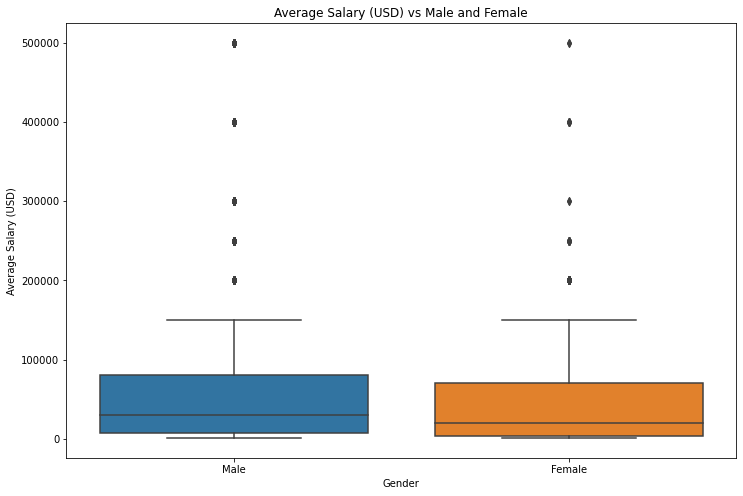

In [19]:
encode_gender = {
    'Male': 0,
    'Female': 1
}
plt.figure(figsize=(12,8))
sns.boxplot(df.Q2.map(encode_gender), df.Q10)
plt.xticks(plt.xticks()[0], encode_gender)
plt.xlabel('Gender')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary (USD) vs Male and Female')
plt.show()

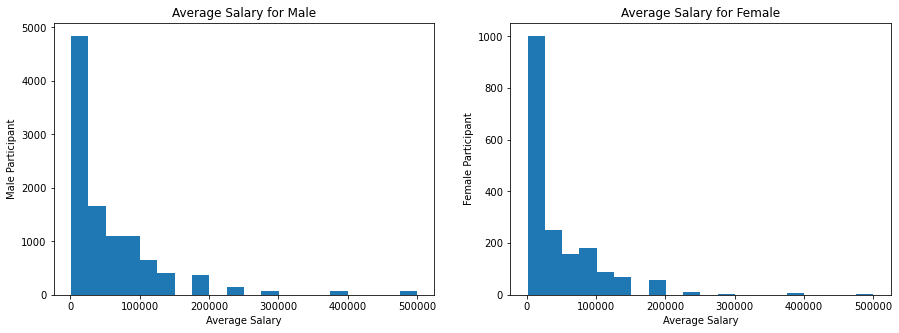

In [20]:
# Plot histogram for male and female
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(np.array(male).reshape(-1), bins=20)
axs[0].set_xlabel('Average Salary')
axs[0].set_ylabel('Male Participant')
axs[0].set_title('Average Salary for Male')

axs[1].hist(np.array(female).reshape(-1), bins=20)
axs[1].set_xlabel('Average Salary')
axs[1].set_ylabel('Female Participant')
axs[1].set_title('Average Salary for Female')
plt.show()

**From the descriptive statistics, it can noticed that the mean of average salary for male is 58710 and for female is 45934, there are different, to test if this is significant we can apply two-sample t-test.**

**From above box plot and histograms, the average salary for male and female are not normal distribution, they are right-skewed distribution.**

# 2.b Perform a two-sample t-test with 0.05 threshold

**One assumption for t-test is the data is normally distributed, when analysing the difference in average salary for male and female, the t-test cannot be applied, since the original distributions are not normal distributions.**

**But the t-test can used to analyse the difference appear between the mean of the average salary for male and female, it is beacuse according to CLT, the mean drawn from original distribution is normal distrubition. After t-test, the p-value is smaller than 0.05, we can conclude that the differece in mean of average salary is statistically significant.**

In [34]:
pvalue = stats.ttest_ind(male, female)[1]
print('P value for the mean of male and female average salary is', np.array(pvalue))
threshold = 0.05
if np.array(pvalue) < threshold:
    print('Statistically significant')
else:
    print('Not statistically significant')

P value for the mean of male and female average salary is [5.10893881e-12]
Statistically significant


# 2.c Bootstrap your data for comparing the mean of salary (Q9) for the two groups

In [21]:
print('Number of male participants:', len(male), '\nNumber of female participants:', len(female))

Number of male participants: 10473 
Number of female participants: 1827


In [22]:
def bootstrap(dataframe, size):
    # Choose the original data set to be the male or female data size
    #sample = np.random.choice(np.array(dataframe).reshape(-1), size = size)
    sample_mean = []
    # Do 1000 times replacement
    for _ in range(1000):
        # Randomly select a group of sample with size equal to the original data size and then put it back
        sample_n = np.random.choice(np.array(dataframe).reshape(-1), size = size)
        sample_mean.append(sample_n.mean())
    return sample_mean

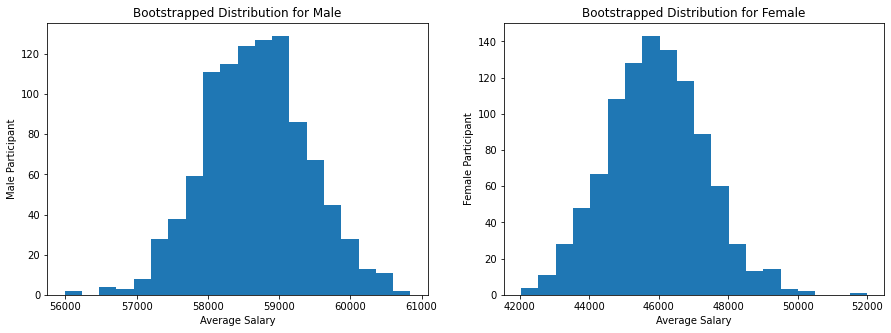

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sample_mean_male = bootstrap(male, len(male))
axs[0].hist(sample_mean_male, bins=20)
axs[0].set_xlabel('Average Salary')
axs[0].set_ylabel('Male Participant')
axs[0].set_title('Bootstrapped Distribution for Male')

sample_mean_female = bootstrap(female, len(female))
axs[1].hist(sample_mean_female, bins=20)
axs[1].set_xlabel('Average Salary')
axs[1].set_ylabel('Female Participant')
axs[1].set_title('Bootstrapped Distribution for Female')
plt.show()

In [24]:
# Distribution of the difference in means
# To plot the PDF for the difference in means, the mean and variance for the difference should be calculated
def distri_diff_mean(data1, data2):
    diff = abs(data1 - data2)
    mu = diff.mean()
    sigma = math.sqrt(data1.var()/len(data1) + data2.var()/len(data2))
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 50)
    return x, mu, sigma

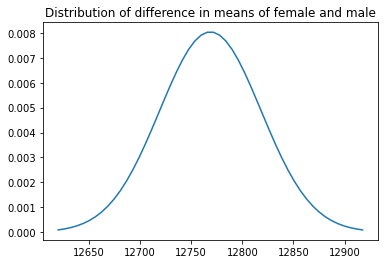

In [25]:
# Distribution for difference between average salary for female and male
x_gender, mu_gender, sigma_gender = distri_diff_mean(np.array(sample_mean_male),np.array(sample_mean_female))
plt.plot(x_gender, stats.norm.pdf(x_gender, mu_gender, sigma_gender))
plt.title('Distribution of difference in means of female and male')
plt.show()

# 2.d Perform a two-sample t-test with 0.05 threshold on the bootstrapped data

In [26]:
pvalue = stats.ttest_ind(sample_mean_male, sample_mean_female)[1]
print('P value for male and female average salary is', np.array(pvalue))
threshold = 0.05
if np.array(pvalue) < threshold:
    print('Statistically significant')
else:
    print('No statistically significant')

P value for male and female average salary is 0.0
Statistically significant


# 2.e Report on Question 2

**Part(a) reports the descriptive statistics, the statistical data shows that the mean for male average salary are larger than female, but we cannot conclude that the difference is not caused by chance. T-test can apply on analysing the different between the mean of average salary, since the Central Limit Theorem states that the mean drawn from original distribution is normally distributed.**

**However, we can not apply to the original average salary data, since the distribution of it is not normally. We cannot make any conclusion sbout the difference between average salary for now.**

**In Part(c), we apply the bootstrapping to resample the original dataset with replacement 1000 times to create 1000 means for the origional dataset. The bootstrapped distributions for male and female are normal distributions. And the distribution of the difference in means is also normal distribution.**

**In Part(d), applying the bootstrapped data to the t-test, the result p-value is 0.0, which is smaller than the threshold 0.05. It means the difference between average salary of male vs. female is statistically significant, it is not caused by chance, we can conclude that male tend to earn more salary than female.**

# 3. Select “highest level of formal education” (Q4) using analysis of variance (ANOVA)

In [27]:
# Compute and report descriptive statistics for each group
bachelor = df[['Q10']].loc[df['Q4'] == 'Bachelor’s degree']
doctoral = df[['Q10']].loc[df['Q4'] == 'Doctoral degree']
master = df[['Q10']].loc[df['Q4'] == 'Master’s degree']

In [28]:
bachelor_mean = bachelor.mean()[0]
doctoral_mean = doctoral.mean()[0]
master_mean = master.mean()[0]
bachelor_median = bachelor.median()[0]
doctoral_median = doctoral.median()[0]
master_median = master.median()[0]
bachelor_std = bachelor.std()[0]
doctoral_std = doctoral.std()[0]
master_std = master.std()[0]

In [29]:
print('Average salary for bachelor: mean:', bachelor_mean, '| median', bachelor_median, '| standard deviation', bachelor_std)
print('Average salary for doctoral: mean:', doctoral_mean, '| median', doctoral_median, '| standard deviation', doctoral_std)
print('Average salary for master: mean:', master_mean, '| median', master_median, '| standard deviation', master_std)

Average salary for bachelor: mean: 44999.25617375781 | median 15000.0 | standard deviation 67923.68079791454
Average salary for doctoral: mean: 75761.40182429188 | median 60000.0 | standard deviation 83376.71709337809
Average salary for master: mean: 58778.62985685072 | median 40000.0 | standard deviation 70265.72860477759


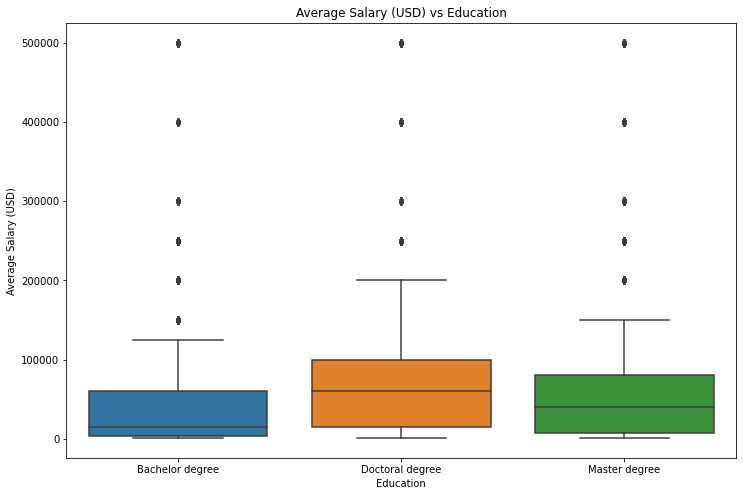

In [32]:
encode_question3 = {   
    'Bachelor’s degree': 0,
    'Doctoral degree': 1,
    'Master’s degree': 2,
    }

plt.figure(figsize=(12,8))
sns.boxplot(df.Q4.map(encode_question3), df.Q10)
plt.xticks(plt.xticks()[0], ('Bachelor degree', 'Doctoral degree', 'Master degree'))
plt.xlabel('Education')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary (USD) vs Education')
plt.show()

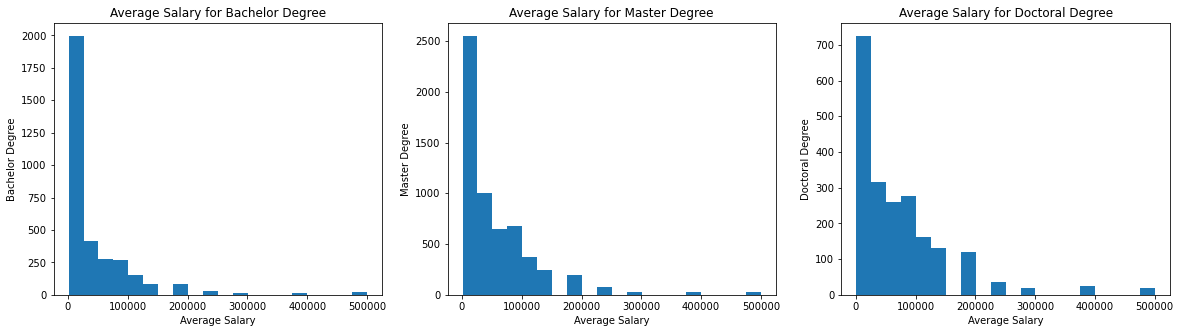

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].hist(np.array(bachelor).reshape(-1), bins=20)
axs[0].set_xlabel('Average Salary')
axs[0].set_ylabel('Bachelor Degree')
axs[0].set_title('Average Salary for Bachelor Degree')

axs[1].hist(np.array(master).reshape(-1), bins=20)
axs[1].set_xlabel('Average Salary')
axs[1].set_ylabel('Master Degree')
axs[1].set_title('Average Salary for Master Degree')

axs[2].hist(np.array(doctoral).reshape(-1), bins=20)
axs[2].set_xlabel('Average Salary')
axs[2].set_ylabel('Doctoral Degree')
axs[2].set_title('Average Salary for Doctoral Degree')

plt.show() 

**One assumption of the AVOVA is to check the normailty of the data. Again, when we analyse the difference between average salary, AVOVA can not apply to it, since the distributions of the average salary for three education groups are not normal distributions, which shown by the above histograms.**

**But when we compare the means of three groups, according to CLT, the means drawn from origional distribution are normally distributed. There is no need to check the normailty for the means, directly apply the t-test to the mean of female and male average salary. Therefore, the result p-value is smaller than threshold 0.05 indicate that the difference appears between the mean of average salary for Bachelor degree, Master degree and Doctoral degree is statictically significant.**

In [34]:
pvalue = f_oneway(bachelor, doctoral, master)[1]
print('P value for difference in mean of average salary for Bachelor degree, Master degree and Doctoral degree is', np.array(pvalue))
threshold = 0.05
if np.array(pvalue) < threshold:
    print('Statistically significant')
else:
    print('Not statistically significant')

P value for difference in mean of average salary for Bachelor degree, Master degree and Doctoral degree is [2.23366851e-51]
Statistically significant


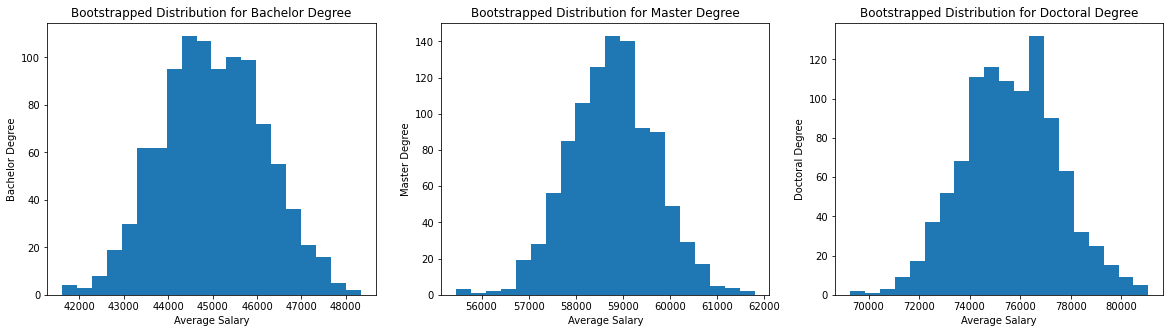

In [35]:
# Bootstrap the data for comparing the mean of salary for three groups
sample_mean_bachelor = bootstrap(bachelor, len(bachelor))
sample_mean_doctoral = bootstrap(doctoral, len(doctoral))
sample_mean_master = bootstrap(master, len(master))

# Plot the histograms for each education group
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].hist(sample_mean_bachelor, bins=20)
axs[0].set_xlabel('Average Salary')
axs[0].set_ylabel('Bachelor Degree')
axs[0].set_title('Bootstrapped Distribution for Bachelor Degree')

axs[1].hist(sample_mean_master, bins=20)
axs[1].set_xlabel('Average Salary')
axs[1].set_ylabel('Master Degree')
axs[1].set_title('Bootstrapped Distribution for Master Degree')

axs[2].hist(sample_mean_doctoral, bins=20)
axs[2].set_xlabel('Average Salary')
axs[2].set_ylabel('Doctoral Degree')
axs[2].set_title('Bootstrapped Distribution for Doctoral Degree')

plt.show() 

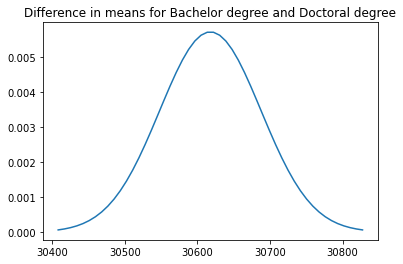

In [36]:
# Distribution of the difference in means for Bachelor Degree and Dcotroal Degree
x_bd, mu_bd, sigma_bd = distri_diff_mean(np.array(sample_mean_bachelor), np.array(sample_mean_doctoral))
plt.plot(x_bd, stats.norm.pdf(x_bd, mu_bd, sigma_bd))
plt.title('Difference in means for Bachelor degree and Doctoral degree')
plt.show()

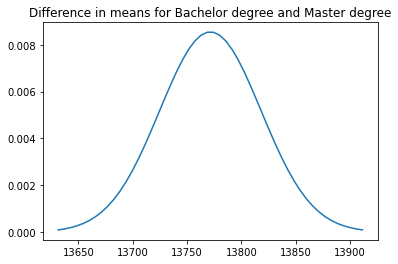

In [37]:
# Distribution of the difference in means for Bachelor Degree and Master Degree
x_bm, mu_bm, sigma_bm = distri_diff_mean(np.array(sample_mean_bachelor), np.array(sample_mean_master))
plt.plot(x_bm, stats.norm.pdf(x_bm, mu_bm, sigma_bm))
plt.title('Difference in means for Bachelor degree and Master degree')
plt.show()

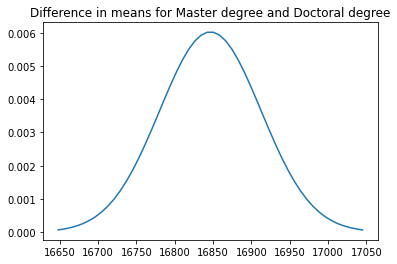

In [38]:
# Distribution of the difference in means for Master Degree and Dcotroal Degree
x_dm, mu_dm, sigma_dm = distri_diff_mean(np.array(sample_mean_doctoral), np.array(sample_mean_master))
plt.plot(x_dm, stats.norm.pdf(x_dm, mu_dm, sigma_dm))
plt.title('Difference in means for Master degree and Doctoral degree')
plt.show()

In [39]:
pvalue = f_oneway(sample_mean_bachelor, sample_mean_doctoral, sample_mean_master)[1]
print('P value for P value for Bachelor Degree, Master Degree and Doctoral Degree average salary is', np.array(pvalue))
threshold = 0.05
if np.array(pvalue) < threshold:
    print('Statistically significant')
else:
    print('Not statistically significant')

P value for P value for Bachelor Degree, Master Degree and Doctoral Degree average salary is 0.0
Statistically significant


# Report on Question 3

**ANOVA is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups. Statistical data shows the mean and median for mean salary of three groups (Bachelor’s degree, Doctoral degree, and Master’s degree). Among these three groups, the mean for average salary for Doctoral degree is 75761, for Master degree is 58779, and for Bachelor degree is 449999. There are difference between the mean of average salary for three groups, to test if this is significant, we need to apply AVOVA.**

**However, if we do the analysis about the original average salary, the AVOVA cannot be applied, since the average salary distributions shown at above histograms for Bachelor’s degree, Doctoral degree, and Master’s degree are not normal distribution.**


**After bootstrap we have 1000 means for each education group and the PDFs show the difference between two education groups are normal distribution.**

**Apply AVOVA to the bootstraped data, the result p-value, which is small than the 0.05 threshold, tell us the difference in average salary between three education groups (Bachelor’s degree, Doctoral degree, and Master’s degree) is statistically significant, not appeared by chance. Doctoral degree earn highest average salary among the three groups, the second highest is Master degree.**

# T-test and AVOVA

**T-test is a method to that determines whether two group are statistically different from each other, whereas ANOVA
determines whether three or more populations are statistically different from each other. Both of them look at the difference in means across groups; however, the ways that they determine the statistical significance are different.**

**Multiple t-tests is also available to compare the means of two or more groups, but, as the number of groups increases, the number of t-tests also increases. With increases in the number of t-tests, it causes the probability of making the type 1 error increases.**

T-test cons:
1. Difficult to find the sample data to satify it assumptions.
2. If the sample data violates the assumption of the t-test, then the output is unreliable.
3. When the degree of freedom is low, a higher t-value is needed in order to reach the t-test significance, which cause a greater tradeoff between the larger power, result in loss of degree of freedom.

T-test pros:
1. Easier for computer to do the calculations for independent samples.
2. It requires small number of data for independent sample.

AVOVA cons:
1. Assumptions are strict.
2. The post-ANOVA t-test is required for further testing.

AVOVA pros:
1. It is an improvement on the t-test, decrease the probability of making the type 1 error.
2. Suitable for multidimensional variables
3. Two-way AVOVA can analyzes of various factors at a time. 